Only run the following cell once

In [1]:
# Only run this cell once
import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

# BLG in STM

To generate a $dI/dV$ spectrum over all gate voltages, we first import the `TunnelingExperiments` module. A tunneling experiment performed on BLG is provided by the object `TunnelingExperiments.BLGinSTM`. The parameters it takes are as follows

* The distance between the top gate (tip) and sample `d1` in units nm
* The distance between the bottom gate and sample `d2` in units nm
* The *relative* permittivity between the tip and sample `e1`
* The *relative* permittivity between the bottom gate and sample `e2`
* Temperature `T` in units K
* The work function of the tip `Wtip` in units eV

In [2]:
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm

#%matplotlib inline

from TunnelingExperiment import TunnelingExperiments

A common example is to have a layer BLG on a ~20 nm thick piece of hBN on a 285 nm thick SiO$_2$ oxide. This sets `d2=20+285=305` nm. The relative permittivity of both hBN and SiO$_2$ is roughly 4, so we set `e2=4`. The tip height varies substantially, but in this example, we'll set `d_1=1` nm. Since the tip sits in vacuum, `e1=1`. If the tip is made of Pt-Ir, then `Wtip=5` eV approximately.

In [3]:
d1 = 0.5 # nm between tip and sample
d2 = 305 # nm between backgate and sample
e1 = 1 # relative permittivity between tip and sample
e2 = 4 # relative permittivity between backgate and sample
T = 0 # Kelvin
Wtip = 5 # eV for work function of the tip

experiment = TunnelingExperiments.BLGinSTM(d1,d2,e1,e2,T,Wtip)

VTrange = [-0.2,0.2]
num_vts_100 = .1


VBrange = [-45,45]
num_vbs_100 = .1

Once the parameters and range of voltages have been chosen, the `experiment` can be run by calling the `generate_tunnelcurrent` method. You will see error messages referring to `Roundoff error`. Ignore these.

In [4]:
experiment.generate_tunnelcurrent(VTrange,num_vts_100,VBrange,num_vbs_100,method='DasSarma')

Computing tunnel currents


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


Finally, to view the results, we call `plot_dIdV`.

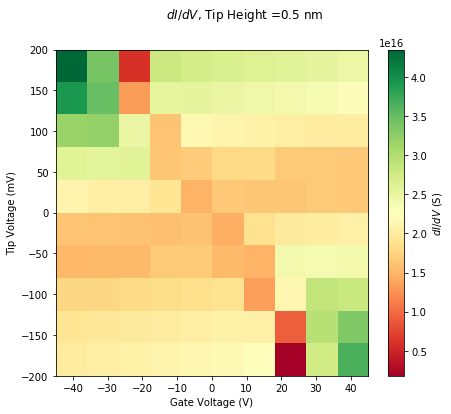

In [5]:
experiment.plot_dIdV()